In [3]:
import pandas as pd
import json
from pandas.io.json import json_normalize


In [7]:
# load data as pandas dataframe
json_df = pd.read_json('C:\\Users\\manas\\Desktop\\Springboard\\Mini_Projects\\data_wrangling_json\\data_wrangling_json\\data\\world_bank_projects.json')
json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...
5,{'$oid': '52b213b38594d8a2be17c785'},2014,October,2013-10-31T00:00:00Z,REPUBLIC OF KENYA,NaN,Republic of Kenya!$!KE,KE,Republic of Kenya,Kenya,...,JB,IBRD,Active,Y,"{'Percent': 100, 'Name': 'Social safety nets'}","[{'code': '54', 'name': 'Social safety nets'}]",54,10000000,10000000,http://www.worldbank.org/projects/P146161?lang=en
6,{'$oid': '52b213b38594d8a2be17c786'},2014,October,2013-10-29T00:00:00Z,GOVERNMENT OF INDIA,2019-06-30T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,TI,IBRD,Active,N,"{'Percent': 20, 'Name': 'Administrative and ci...","[{'code': '25', 'name': 'Administrative and ci...","39,25",500000000,500000000,http://www.worldbank.org/projects/P121185/firs...
7,{'$oid': '52b213b38594d8a2be17c787'},2014,October,2013-10-29T00:00:00Z,PEOPLE'S REPUBLIC OF CHINA,NaN,People's Republic of China!$!CN,CN,People's Republic of China,China,...,LR,IBRD,Active,N,"{'Percent': 100, 'Name': 'Climate change'}","[{'code': '81', 'name': 'Climate change'}]",81,0,27280000,http://www.worldbank.org/projects/P127033/chin...
8,{'$oid': '52b213b38594d8a2be17c788'},2014,October,2013-10-29T00:00:00Z,THE GOVERNMENT OF INDIA,2018-12-31T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,TI,IBRD,Active,N,"{'Percent': 87, 'Name': 'Other rural developme...","[{'code': '79', 'name': 'Other rural developme...",79,160000000,160000000,http://www.worldbank.org/projects/P130164/raja...
9,{'$oid': '52b213b38594d8a2be17c789'},2014,October,2013-10-29T00:00:00Z,THE KINGDOM OF MOROCCO,2014-12-31T00:00:00Z,Kingdom of Morocco!$!MA,MA,Kingdom of Morocco,Morocco,...,"BM,BC,BZ",IBRD,Active,N,"{'Percent': 33, 'Name': 'Other accountability/...","[{'code': '29', 'name': 'Other accountability/...","27,30,29",200000000,200000000,http://www.worldbank.org/projects/P130903?lang=en


Q1. Find the 10 countries with most projects:

The dataframe json_df includes (but not limited to) the name of world bank projects and the borrowing countries. Each row contains info for one project. So if one country has multiple projects its name will appear multiple times. So the approach is to count the number of times the name of the country appears in the table.

In [199]:
# Q1. Find the 10 countries with most projects
json_df.columns
# numbers of project each country
countrynames = json_df['countryname'].value_counts()
# 10 countries with most projects
country_most_projects = countrynames.head(10)
country_most_projects

Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Nepal                              12
Africa                             11
Republic of Mozambique             11
Name: countryname, dtype: int64

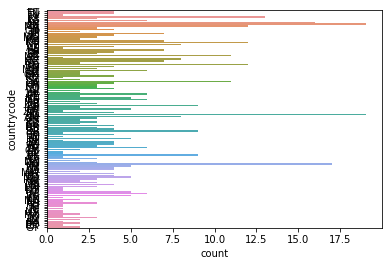

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(y='countrycode', data=json_df)


Q2. Find the top 10 major project themes (using column 'mjtheme_namecode'):

Normalization with the 'mjtheme_namecode' has listed the name of the projects which were nested within the 'theme_namecode' column. Same project may be conducted by several countries. Therefore by counting the number of a project in the table will give us idea about the major projects.


In [188]:
# Q2. Find the top major project themes
# Load json as a string
json_string = json.load((open('C:\\Users\\manas\\Desktop\\Springboard\\Mini_Projects\\data_wrangling_json\\data_wrangling_json\\data\\world_bank_projects.json')))
#normalization to create table with 'mjtheme_namecode' nested in 'theme_namecode'
json_norm = json_normalize(json_string,'mjtheme_namecode')
# counting the number each project is conducted by countries
project_counts = json_norm['name'].value_counts()
# As there is one project without a name 11 most major products are included here
project_counts.head(11)

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Economic management                              33
Name: name, dtype: int64

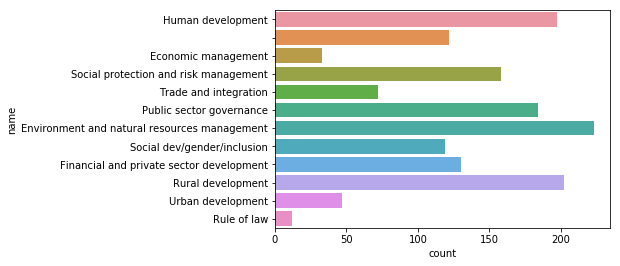

In [224]:
# plotting the major project count with blank project names (orange in plot)
ax = sns.countplot(y='name', data=json_norm)

Q3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in:

First step is to find names of all the projects and their associated codes. To do so, only the rows with (non-blank) project names are selected (json_norm.name != '') and then the duplicate rows are dropped using .drop_duplicates() method. The resulting dataframe 'name_code' contains unique project names and their corresponding codes. 
Then two dataframes, 'json_norm' and 'name_code' are then merged based on the 'code' column to populate all the blank rows in resulting dataframe 'merge_project'. The 'name_x' column from 'merge_project' dataframe is removed using .drop() method. The 'name_y' is then renamed as 'name' using .rename() method.

In [194]:
# Q3. Create a dataframe with missing names filled in
# selecting rows with non-blank 'name's and then dropping duplicate rows
# json_norm[~json_norm.name.isin([''])].drop_duplicates()
name_code = json_norm[(json_norm.name != '')].drop_duplicates()
name_code

,code,name
0,8,Human development
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
8,7,Social dev/gender/inclusion
11,4,Financial and private sector development
18,10,Rural development
53,9,Urban development


In [193]:
# Two dataframes, json_norm and name_code have been merged based on the 'code' column, 
# to populate all the rows in 'name' column from name_code
merge_project = pd.merge(json_norm, name_code, on=['code'], how ='inner')
merge_project.head()

,code,name_x,name_y
0,8,Human development,Human development
1,8,,Human development
2,8,Human development,Human development
3,8,Human development,Human development
4,8,Human development,Human development


In [195]:
# dropping the column 'name_x' from merged dataframe
project_trim = merge_project.drop(columns='name_x')
# renaming the column 'name_y': 'name'
project_list = project_trim.rename(columns={'name_y':'name'})
project_list.head()

,code,name
0,8,Human development
1,8,Human development
2,8,Human development
3,8,Human development
4,8,Human development


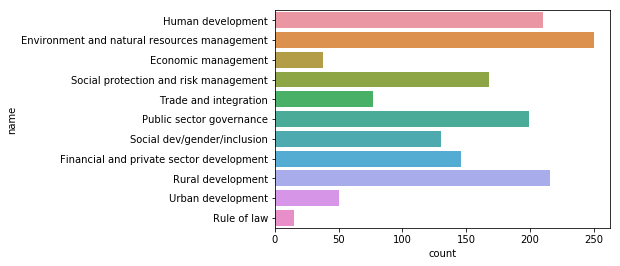

In [225]:
# plotting the major project count after filling blank project names
ax = sns.countplot(y='name', data=project_list)